### Imports

In [1]:
import numpy as np

In [2]:
import numpy.linalg as la

In [3]:
import matplotlib.pyplot as plt

In [4]:
from scipy.integrate import solve_ivp

In [5]:
from scipy.optimize import newton

In [6]:
from scipy import sparse as sp

In [7]:
from copy import deepcopy

### Mesh

In [8]:
class cell:
    def __init__(self, properties):
        self.properties = properties

    def __add__(self, other):
        for i in self.properties.items():
            self.properties[i[0]] += other.properties[i[0]]

    def get_props(self):
        return self.properties

In [9]:
class mesh:
    def __init__(self, size, cell):
        self.dim = 2
        self.size = size
        self.default_cell = deepcopy(cell)
        self.mesh = np.zeros((size,)*self.dim).tolist()
        self.mesh = self.set_mesh(cell, self.dim, self.mesh)

    def set_mesh(self, cell, dim, list):
        if dim == 0:
            return 0
        else:
            for i in range(len(list)):
                list[i] = self.set_mesh(cell, dim - 1, list[i])
            return list
            
    def get_mesh(self):
        return self.mesh

    def add_mesh(self, i, j, add):
        self.mesh[i][j] += add

### Equations

In [10]:
def ptl(i, j, size):
    return i * size + j

In [11]:
def system(limits, mesh):
    # limits = [left, top, right, bottom]
        
    size = len(mesh.get_mesh())

    A = sp.lil_array((size**2, size**2))
    b = np.zeros(size**2)
    for i in range(size):
        for j in range(size):
            p = ptl(i, j, size)
            
            A[p, p] -= 4
            lamb = 0.25 * size
            b[p] -= 0.05 * np.abs((np.sin(2 * np.pi * i / lamb)))
            
            if (j != size - 1):
                A[p, p + 1] += 1
            else:
                b[p] -= limits[2]

            if (j != 0):
                A[p, p - 1] += 1
            else:
                b[p] -= limits[0]

            if (i != size - 1):
                A[p, p + size] += 1
            else:
                b[p] -= limits[3]

            if (i != 0):
                A[p, p - size] += 1
            else:
                b[p] -= limits[1]

    return [A, b]

### Main

In [12]:
mesh = mesh(1000, None)

In [13]:
limits = [-1000, -1000, -1000, 1000]

In [14]:
A, b = system(limits, mesh)

In [15]:
A = A.tocsr()

In [16]:
solution = sp.linalg.spsolve(A, b)

In [17]:
size = len(mesh.get_mesh())
for i in range(size):
    for j in range(size):
        mesh.add_mesh(i, j, solution[i * size + j])

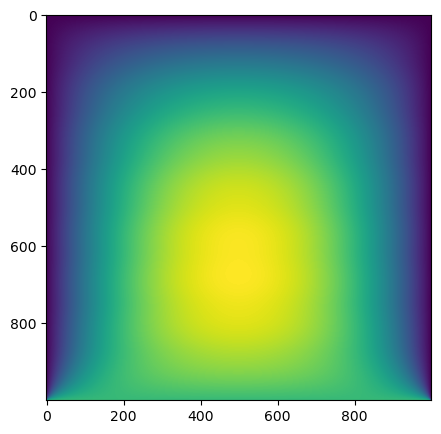

In [18]:
grid = np.zeros((size, size))
mes = mesh.get_mesh()
for i in range(size):
    for j in range(size):
        grid[i][j] = mes[i][j]

fig = plt.figure(figsize=(5, 5))
plt.imshow(grid)
plt.savefig("heat.png")

In [19]:
print(solution.max())

1980.7015674973486


In [20]:
print(solution.min())

-999.9131572262042
